In [112]:
%reload_kedro
prefix = ""
X_train =  io.load(prefix + 'X_train')
X_test =  io.load(prefix + 'X_test')
X_valid =  io.load(prefix + 'X_valid')
y_train = io.load('y_train')

2019-07-03 14:11:46,859 - INFO - ** Kedro project Twitter Network
2019-07-03 14:11:46,861 - INFO - Loading: /Users/tomduke/Documents/Academic/MBusA/Modules/M3 - Advanced Analytics/Machine Learning/twitter-network/conf/base/logging.yml
2019-07-03 14:11:46,867 - INFO - Loading: /Users/tomduke/Documents/Academic/MBusA/Modules/M3 - Advanced Analytics/Machine Learning/twitter-network/conf/base/catalog.yml
2019-07-03 14:11:46,874 - INFO - Loading: /Users/tomduke/Documents/Academic/MBusA/Modules/M3 - Advanced Analytics/Machine Learning/twitter-network/conf/base/credentials.yml
2019-07-03 14:11:46,877 - INFO - Loading: /Users/tomduke/Documents/Academic/MBusA/Modules/M3 - Advanced Analytics/Machine Learning/twitter-network/conf/base/parameters.yml
2019-07-03 14:11:46,887 - INFO - Defined global variables proj_dir, proj_name, conf and io
2019-07-03 14:11:46,889 - INFO - Loading data from `non_stand_X_train` (PickleLocalDataSet)...
2019-07-03 14:11:46,934 - INFO - Loading data from `X_train` (Pic

In [107]:
X_train.shape

(39240, 28)

In [108]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

def color_type(var_name):
    if "source" in var_name:
        return "blue"
    elif "sink" in var_name:
        return "red"
    else:
        return "white"

def corr_plot(df, sort = False, order = None, absolute = True, exclude = None):
    fg_color = 'white'
    if order:
        df = df[order]
    f = plt.figure(figsize=(19, 15))
    cor = df.corr()
    if absolute:
        cor = cor.abs()
    if sort:
        cor = cor.sort_values("label", ascending = False)
        cor = cor[list(cor.index)]
    if exclude:
        cor[exclude] = -1
        cor.loc[exclude] = -1
    columns = cor.columns
    plt.matshow(cor, fignum=f.number)
    plt.xticks(range(df.shape[1]), cor.columns, fontsize=14, rotation=90, color = fg_color)
    plt.yticks(range(df.shape[1]), cor.columns, fontsize=14, color = fg_color)

    cb = plt.colorbar()
    cb.set_label('', color=fg_color)
    cb.ax.yaxis.set_tick_params(color=fg_color)
    cb.outline.set_edgecolor(fg_color)

    plt.setp(plt.getp(cb.ax.axes, 'yticklabels'), color=fg_color)

    cb.ax.tick_params(labelsize=14)

2019-07-03 14:13:56,466 - INFO - Loading data from `included_features` (PickleLocalDataSet)...


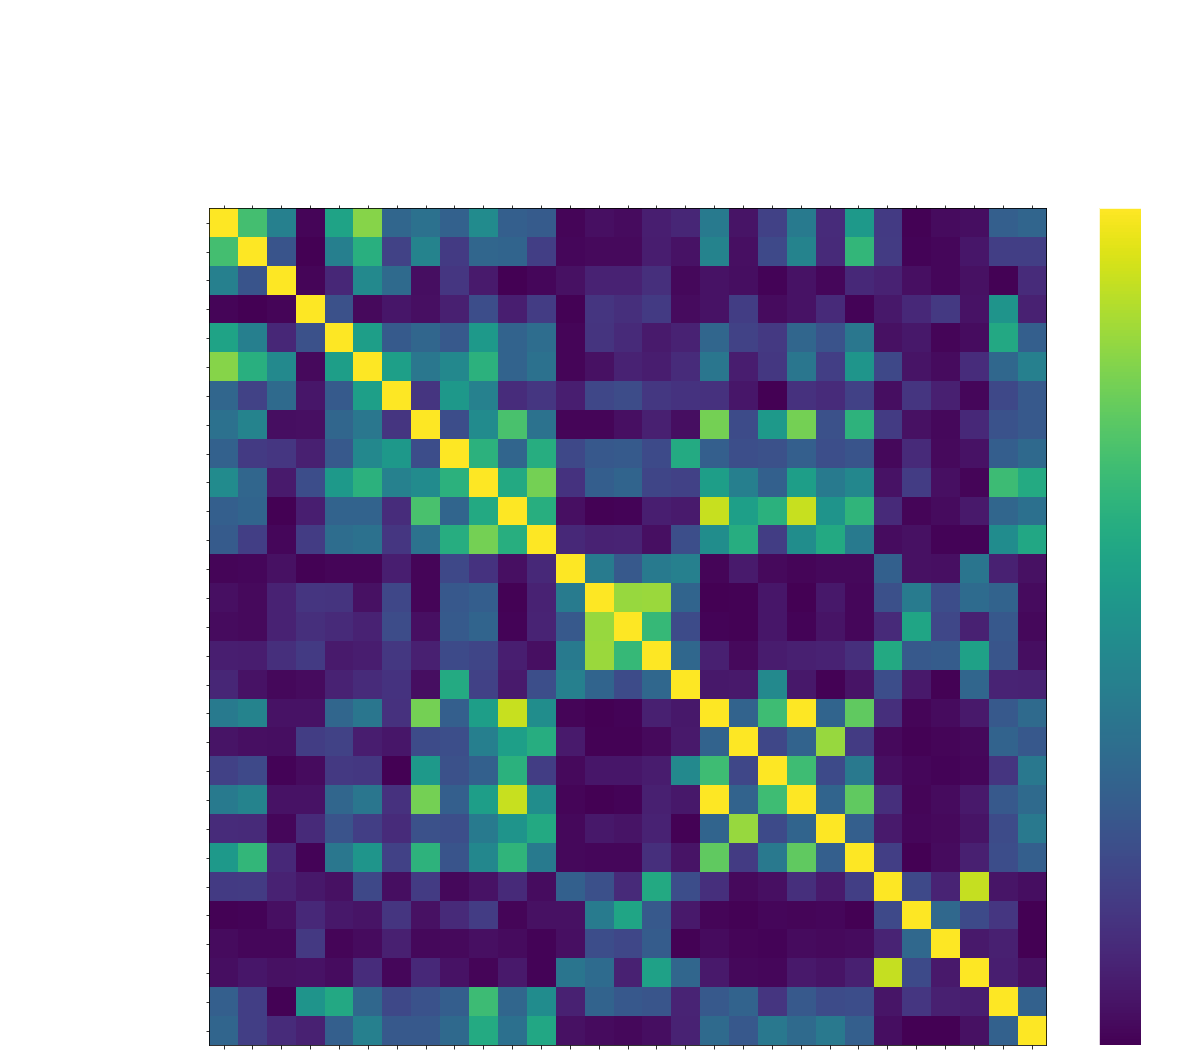

In [114]:
features = io.load('included_features')
df = pd.DataFrame(X_train, columns = features)
df["label"] = np.array(y_train[:len(X_train)])
corr_plot(df)

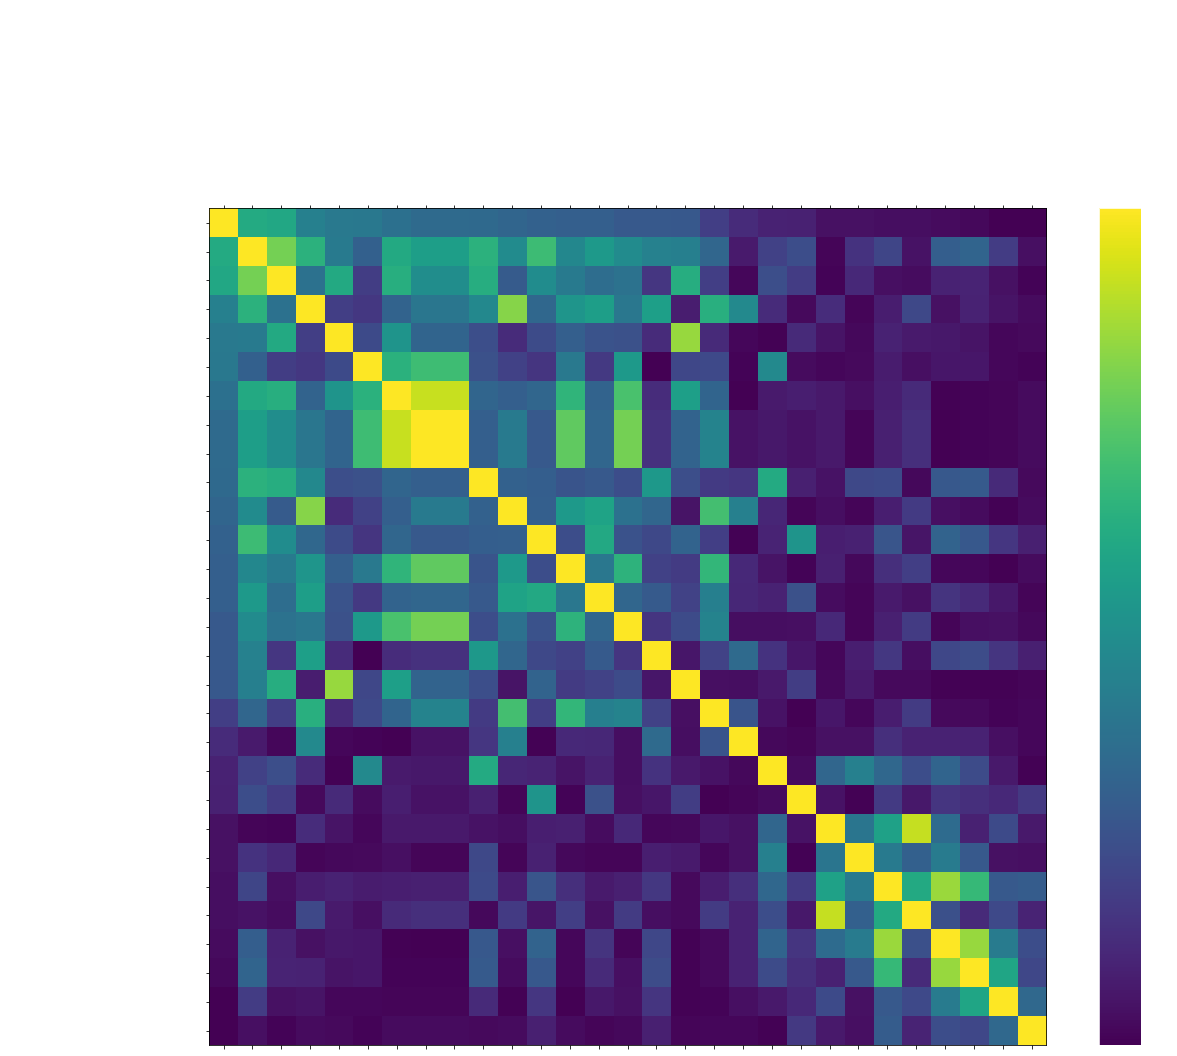

In [115]:
corr_plot(df, sort = True)

In [52]:
from sklearn.feature_selection import mutual_info_classif
MI = pd.DataFrame(mutual_info_classif(X_train, y_train), index = X_train.columns, columns = ["MI"])
MI_order = list(MI.sort_values("MI", ascending = False).index); MI_order

['label',
 'sink_page_rank',
 'sink_katz',
 'log_sink_neighbors',
 'sink_centrality',
 'log_sink_in_degree',
 'sink_in_centrality',
 'RA_neighbors',
 'RA_undirected',
 'AA_undirected',
 'AA_neighbors',
 'RA_transient_in',
 'RA_predecessors',
 'AA_predecessors',
 'link_efficiency',
 'AA_transient_in',
 'log_common_neighbors',
 'hub_promoted_index',
 'hub_suppressed_index',
 'JC_neighbors',
 'sorensen_index',
 'JC_undirected',
 'PA_predecessors',
 'PA_neighbors',
 'PA_undirected',
 'shortest_path',
 'JC_predecessors',
 'transitive_links',
 'JC_transient_in',
 'cos_predecessors',
 'cos_neighbors',
 'LHN_index',
 'cos_transient_in',
 'PA_transient_in',
 'sink_in_density',
 'log_sink_out_degree',
 'sink_out_density',
 'sink_bi_density',
 'log_sink_bi_degree',
 'sink_out_centrality',
 'log_sink_avg_nbr_degree',
 'PA_transient_out',
 'sink_reciprocity',
 'PA_successors',
 'JC_successors',
 'cos_successors',
 'RA_successors',
 'AA_successors',
 'AA_transient_out',
 'JC_transient_out',
 'RA_tra

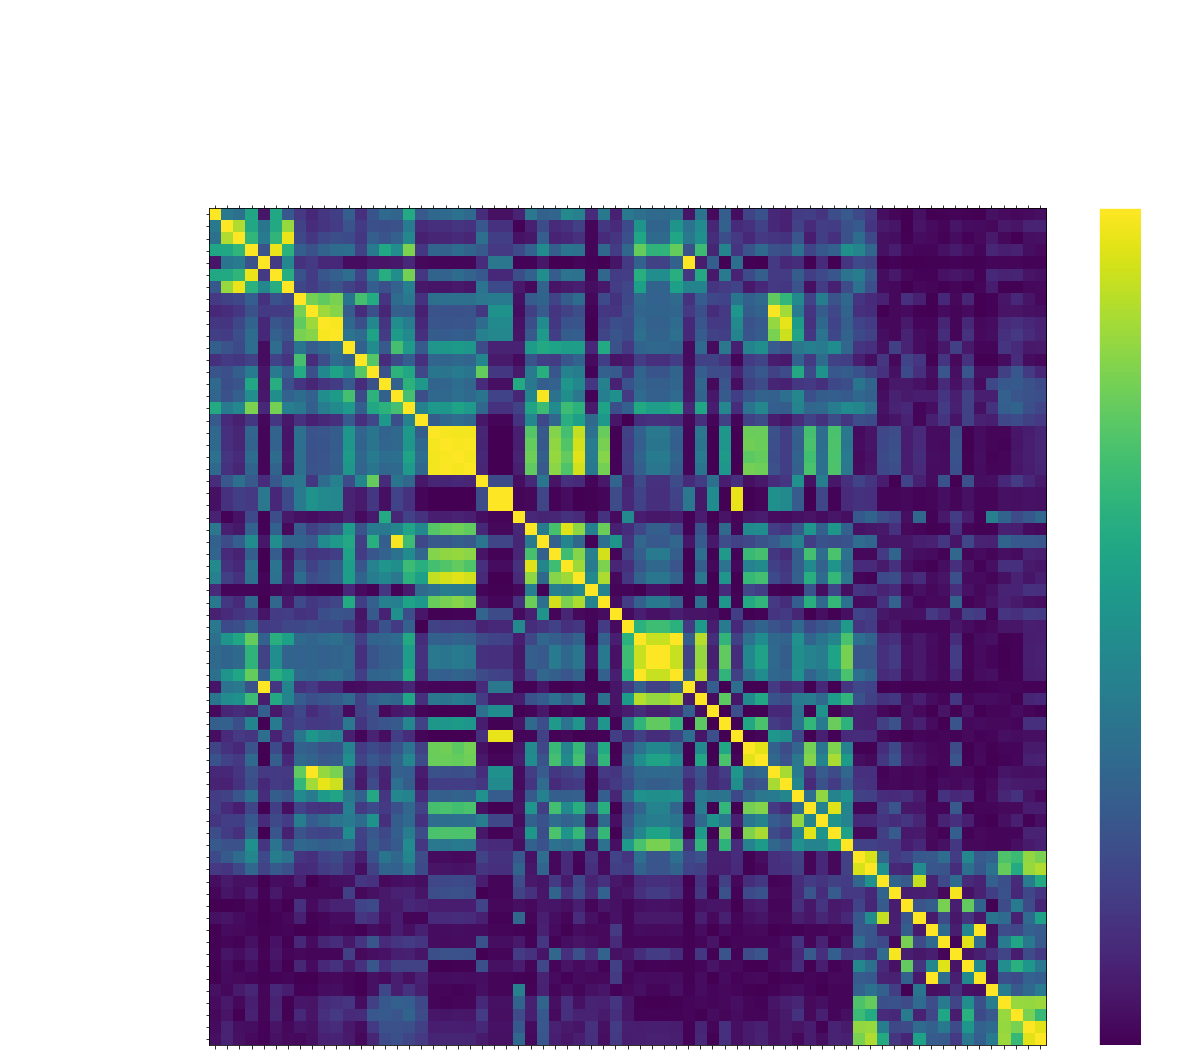

In [83]:
corr_plot(df, order = MI_order)

In [79]:
substrings = ["AA","JC","RA","PA","cos","source_in","source_out","source_bi","sink_in","sink_out","sink_bi"]
sim_order = [[x for x in MI_order if substring in x] for substring in substrings]
sim_exclude = [x[1:] for x in sim_order]
sim_exclude = [x for sublist in sim_exclude for x in sublist]; sim_exclude

['AA_neighbors',
 'AA_predecessors',
 'AA_transient_in',
 'AA_successors',
 'AA_transient_out',
 'JC_undirected',
 'JC_predecessors',
 'JC_transient_in',
 'JC_successors',
 'JC_transient_out',
 'RA_undirected',
 'RA_transient_in',
 'RA_predecessors',
 'RA_successors',
 'RA_transient_out',
 'PA_neighbors',
 'PA_undirected',
 'PA_transient_in',
 'PA_transient_out',
 'PA_successors',
 'cos_neighbors',
 'cos_transient_in',
 'cos_successors',
 'cos_transient_out',
 'source_in_centrality',
 'log_source_in_degree',
 'source_out_centrality',
 'log_source_out_degree',
 'log_source_bi_degree',
 'sink_in_centrality',
 'sink_in_density',
 'sink_out_density',
 'sink_out_centrality',
 'log_sink_bi_degree']

In [82]:
MI_subset = [x for x in MI_order if x not in sim_exclude]; len(MI_subset) - 1

34

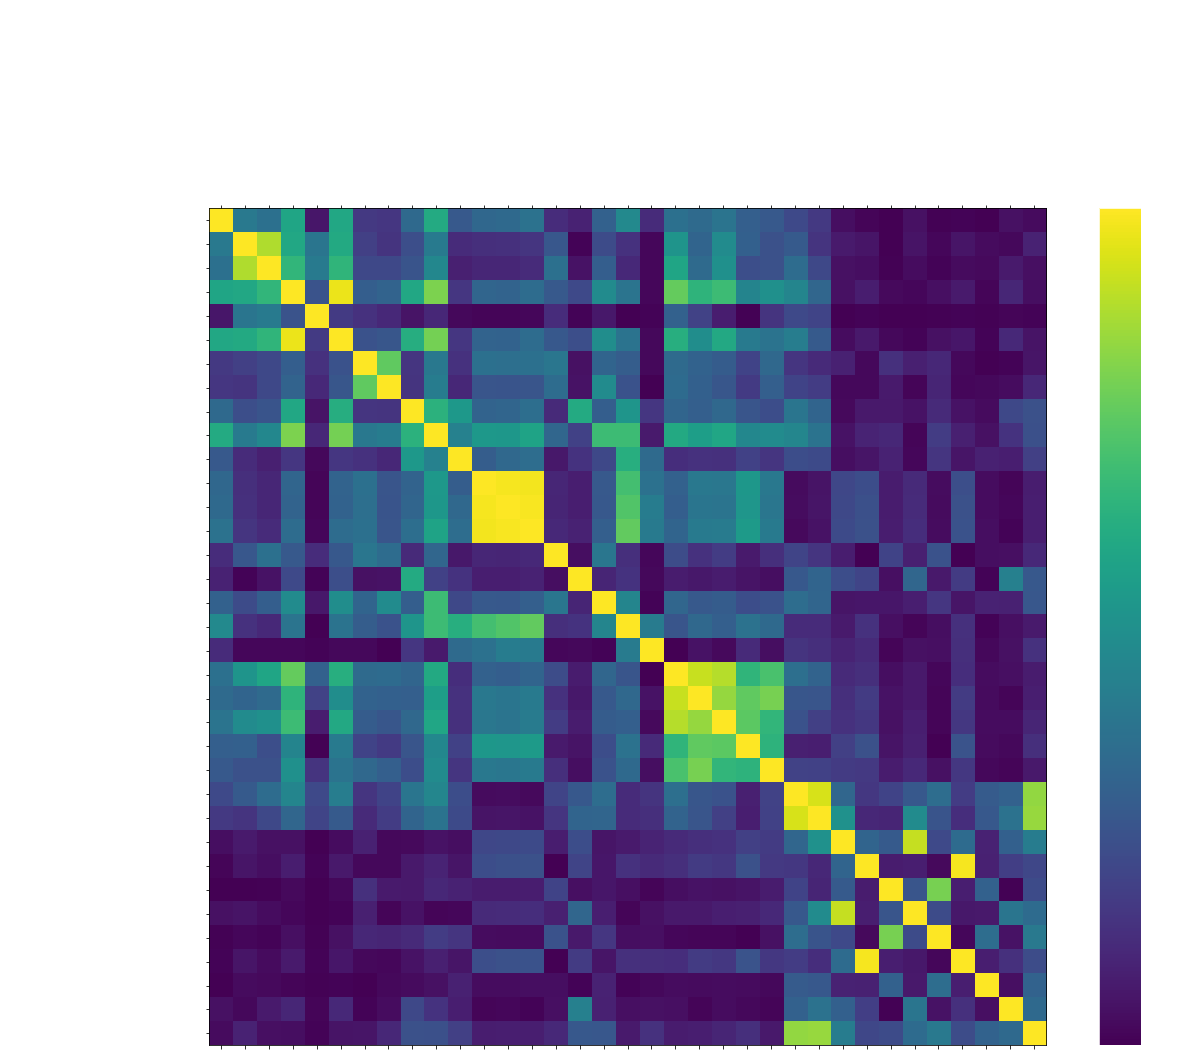

In [81]:
corr_plot(df, order = MI_subset)

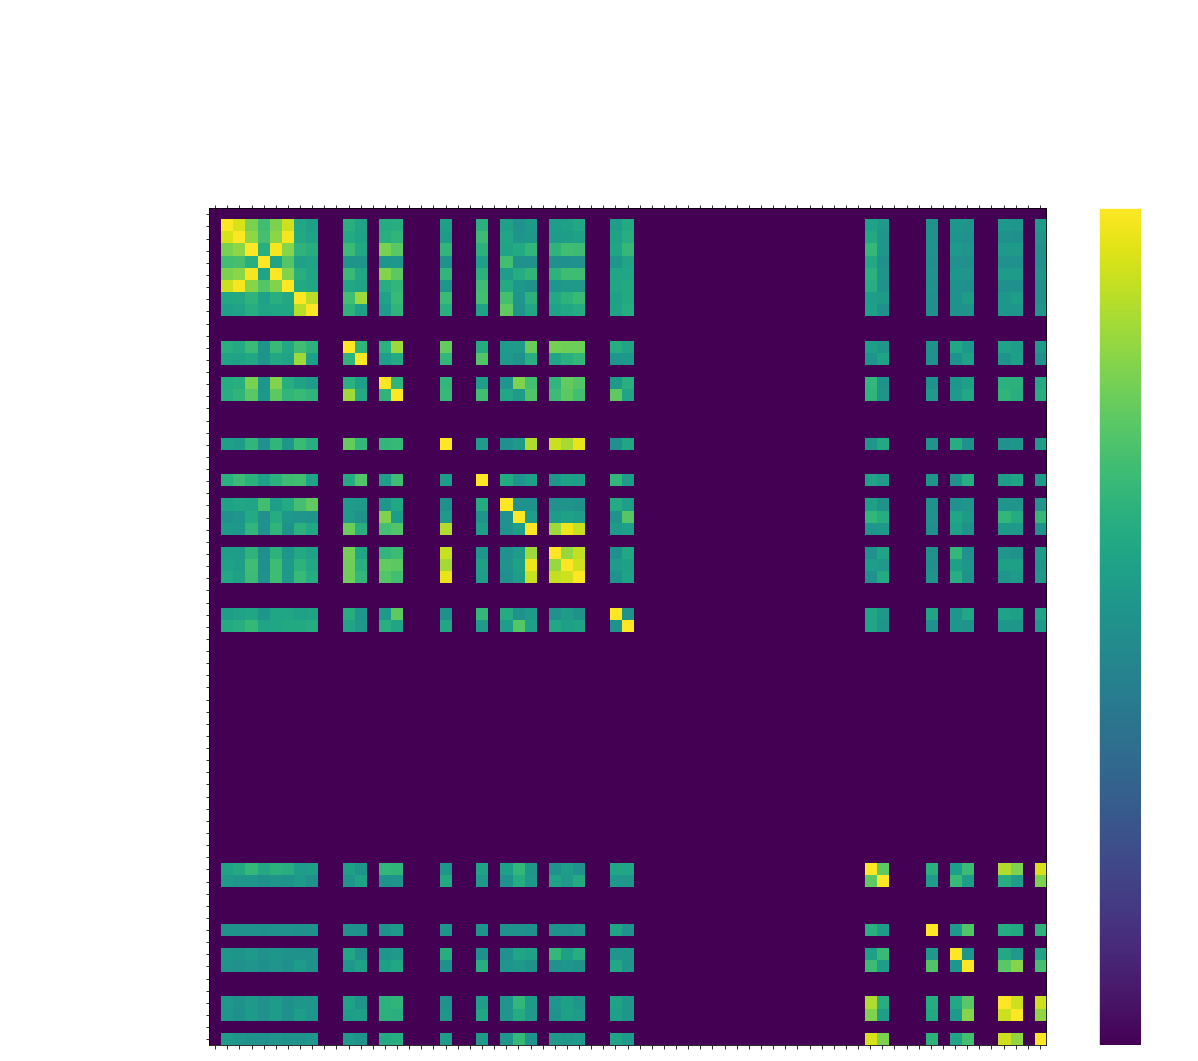

In [105]:
# M1 selection
features = X_train.columns
included =  ['sink_page_rank',
 'sink_in_density',
 'RA_undirected',
 'RA_neighbors',
 'source_out_centrality',
 'log_node_boundary_size',
 'RA_transient_in',
 'sink_katz',
 'sink_in_centrality',
 'log_source_bi_degree',
 'log_source_out_degree',
 'log_sink_in_degree',
 'cos_neighbors',
 'sink_centrality',
 'PA_predecessors',
 'log_source_in_degree',
 'source_in_density',
 'AA_transient_in',
 'RA_predecessors',
 'JC_predecessors',
 'link_efficiency',
 'cos_predecessors',
 'PA_transient_in',
 'JC_neighbors',
 'shortest_path',
 'source_bi_density',
 'log_sink_neighbors',
 'source_in_centrality',
 'JC_transient_in',
 'PA_undirected']
excluded = [x for x in features if x not in included]
corr_plot(df, exclude = excluded, order = MI_order)